## 1. Importi

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import csv
import os.path

## 2. Branje podatkov

In [2]:
with open('../data/kd2018.csv', 'rt') as csvfile:
    reader = csv.reader(csvfile, delimiter=';')
    head0 = next(reader)
    none_handler = lambda i : i or None
    main_data18 = np.array([none_handler(i) for i in [row for row in reader]])

In [3]:
with open('../data/kd2019.csv', 'rt') as csvfile:
    reader = csv.reader(csvfile, delimiter=';')
    head1 = next(reader)
    none_handler = lambda i : i or None
    main_data19 = np.array([none_handler(i) for i in [row for row in reader]])

In [4]:
with open('../data/kd2020.csv', 'rt') as csvfile:
    reader = csv.reader(csvfile, delimiter=';')
    head2 = next(reader)
    none_handler = lambda i : i or None
    main_data20 = np.array([none_handler(i) for i in [row for row in reader]])

In [5]:
with open('../data/kd2021.csv', 'rt') as csvfile:
    reader = csv.reader(csvfile, delimiter=';')
    head3 = next(reader)
    none_handler = lambda i : i or None
    main_data21 = np.array([none_handler(i) for i in [row for row in reader]])

### 2.1 Priprava podatkov
V podatkih je nek zločin zapisan večrat. To je ocitno, saj se zaporedna številka kaznivega dejanja ponavlja večrat.

In [6]:
found_ids = set()
rows_to_keep = np.array([])
for i in range(len(main_data18)):
    if (main_data18[i][0] not in found_ids):
        rows_to_keep = np.append(rows_to_keep, True)
        found_ids.add(main_data18[i][0])
    else:
        rows_to_keep = np.append(rows_to_keep, False)

main_data18_filtered = main_data18[np.ma.make_mask(rows_to_keep)]

found_ids = set()
rows_to_keep = np.array([])
for i in range(len(main_data19)):
    if (main_data19[i][0] not in found_ids):
        rows_to_keep = np.append(rows_to_keep, True)
        found_ids.add(main_data19[i][0])
    else:
        rows_to_keep = np.append(rows_to_keep, False)

main_data19_filtered = main_data19[np.ma.make_mask(rows_to_keep)]

found_ids = set()
rows_to_keep = np.array([])
for i in range(len(main_data20)):
    if (main_data20[i][0] not in found_ids):
        rows_to_keep = np.append(rows_to_keep, True)
        found_ids.add(main_data20[i][0])
    else:
        rows_to_keep = np.append(rows_to_keep, False)

main_data20_filtered = main_data20[np.ma.make_mask(rows_to_keep)]

found_ids = set()
rows_to_keep = np.array([])
for i in range(len(main_data21)):
    if (main_data21[i][0] not in found_ids):
        rows_to_keep = np.append(rows_to_keep, True)
        found_ids.add(main_data21[i][0])
    else:
        rows_to_keep = np.append(rows_to_keep, False)

main_data21_filtered = main_data21[np.ma.make_mask(rows_to_keep)]

In [7]:
main_data = np.concatenate((main_data18_filtered, main_data19_filtered, main_data20_filtered, main_data21_filtered))

In [8]:
cities, counts = np.unique(main_data18[:, 19], return_counts=True)
dict_id_city = dict((id, str.lower(city)) for id, city in enumerate(cities))
dict_city_id = dict((str.lower(city), id) for id, city in enumerate(cities))

## Brisanje duplikatov

## 3. Štetje zločinov v posamezni občini

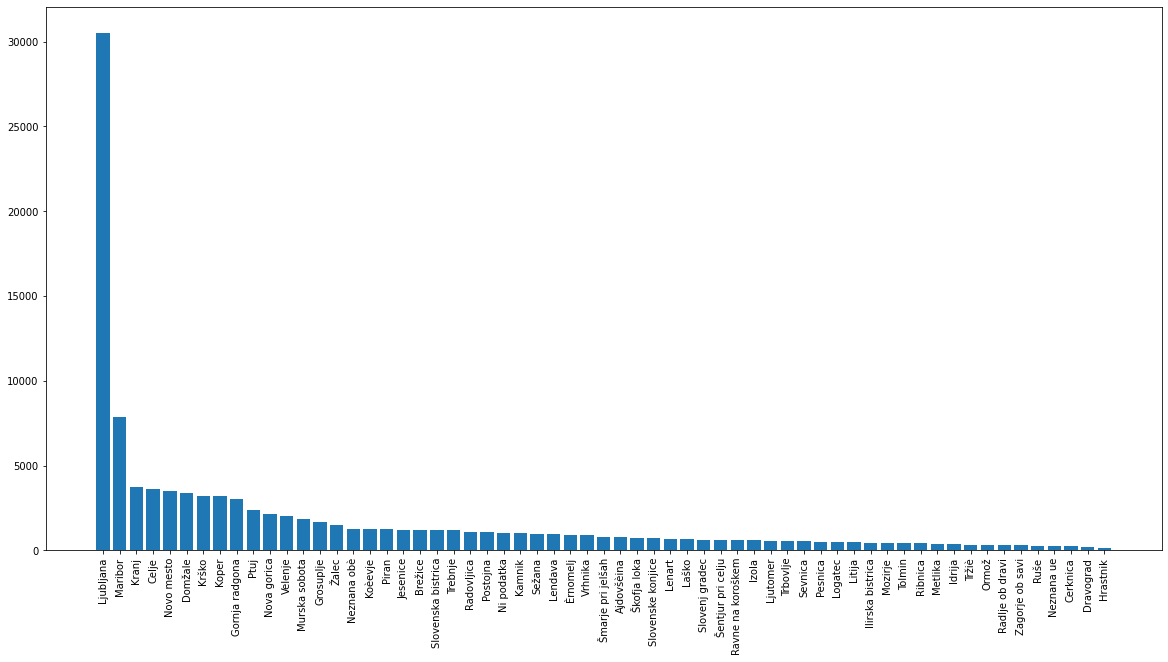

In [9]:
# count number of occurences of each value in column
dict_cityId_crimeCount = dict((dict_city_id[str.lower(cities[i])], counts[i]) for i in range(len(cities)))

y_axis = np.array([str.capitalize(dict_id_city[cityId]) for cityId in dict_cityId_crimeCount.keys()])
x_axis = np.array([dict_cityId_crimeCount[cityId] for cityId in dict_cityId_crimeCount.keys()])

counts_argsort = np.argsort(x_axis)[::-1]

# make graph of number of occurences of each value in column
plt.figure(figsize=(20, 10))
plt.xticks(rotation=90)
plt.bar(y_axis[counts_argsort], x_axis[counts_argsort])
plt.show()

Že takoj na prvi pogled je razvidno, da se največ zločina zgodi v Ljubljani. Sigurno pa na podlagi teh rezultatov ne moremo odgovoriti na vprašanje, "Katera občina je najbolj varna/nevarna?". Dodal bom podatke za število prebivalcev v vsaki občini.

In [10]:
with open('../data/stevilo_prebivalcev_po_obcinah.csv', 'rt', encoding="utf-8") as csvfile:
    reader = csv.reader(csvfile, delimiter=';')
    head2 = next(reader)
    none_handler = lambda i : i or None
    count_per_city = np.array([none_handler(i) for i in [row for row in reader]])

In [11]:
# if name contains / split by / and keep first part
count_per_city = [(str.split(row[0], '/')[0], row[1]) for row in count_per_city]
dict_cityId_popCount = dict([(dict_city_id[str.lower(count_per_city[i][0])], count_per_city[i][1]) for i in range(len(count_per_city)) if str.lower(count_per_city[i][0]) in dict_city_id.keys()])

# delete unknown values from cities we are watching
to_be_deleted = []
for id in dict_id_city.keys():
    if id not in dict_cityId_popCount.keys():
        to_be_deleted.append(id)

print(f"Izbrisani so bili podatki {[dict_id_city[id] for id in to_be_deleted]}, saj za njih ne poznamo prave občine, ali pa le ne poznamo števila prebivalcev.")

for id in to_be_deleted:
    del dict_city_id[dict_id_city[id]]
    del dict_id_city[id]

Izbrisani so bili podatki ['ajdovšèina', 'brežice', 'domžale', 'koèevje', 'krško', 'laško', 'neznana obè', 'neznana ue', 'ni podatka', 'ormož', 'ravne na koroškem', 'ruše', 'sežana', 'tržiè', 'èrnomelj', 'šentjur pri celju', 'škofja loka', 'šmarje pri jelšah', 'žalec'], saj za njih ne poznamo prave občine, ali pa le ne poznamo števila prebivalcev.


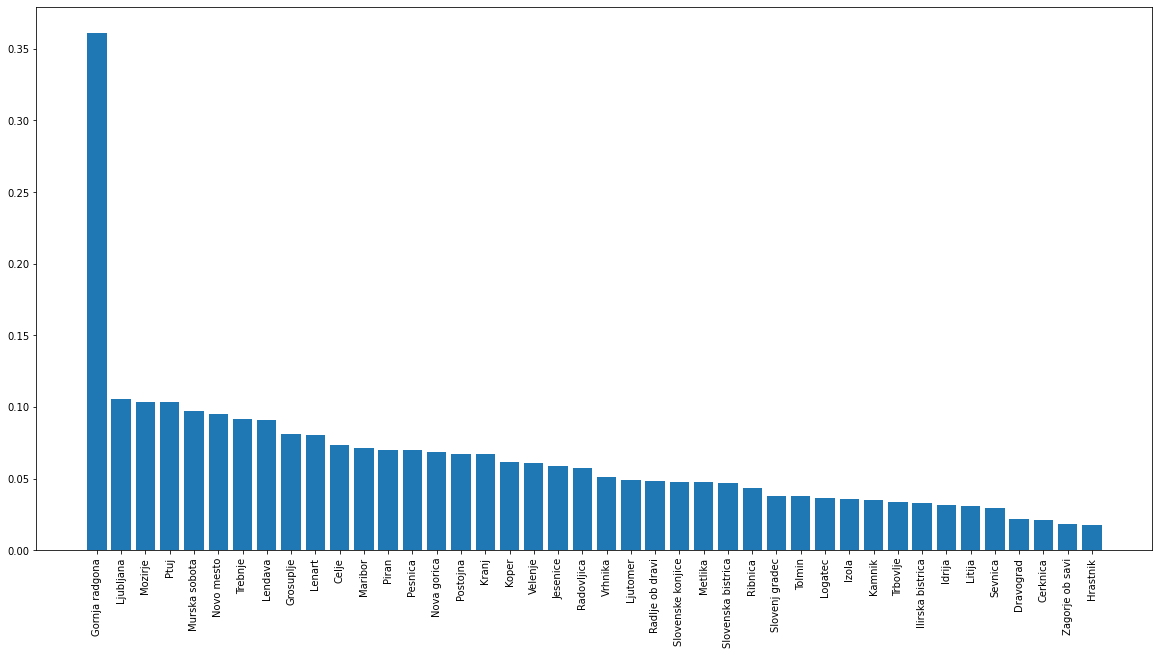

In [12]:
# normalized data of crimes per city by population of city
crime_per_city_norm0 = np.array([tuple([cityId, float(dict_cityId_crimeCount[cityId]) / float(dict_cityId_popCount[cityId])]) for cityId in dict_id_city.keys()])

cityId, x_axis = zip(*crime_per_city_norm0)

x_axis_argsort = np.argsort(x_axis)[::-1]
x_axis = np.array(x_axis)
y_axis = np.array([str.capitalize(dict_id_city[id]) for id in cityId])


plt.figure(figsize=(20, 10))
plt.xticks(rotation=90)
plt.bar(y_axis[x_axis_argsort], x_axis[x_axis_argsort])
plt.show()

Murska sobota vrne največjo vrednost normaliziranega števila kriminala s številom prebivalcev. Zakaj?
Vse primere zločina v Murski Soboti bom zapisal v datoteko.

In [13]:
ms_crime = np.array([i for i in main_data if str.lower(i[19]) == 'murska sobota'])

if (not os.path.exists('../data/kd2021_murska_sobota.csv')):
    open('../data/kd2021_murska_sobota.csv', 'x')

with open('../data/kd2021_murska_sobota.csv', 'w', encoding="utf-8") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(head1)
    writer.writerows(ms_crime)

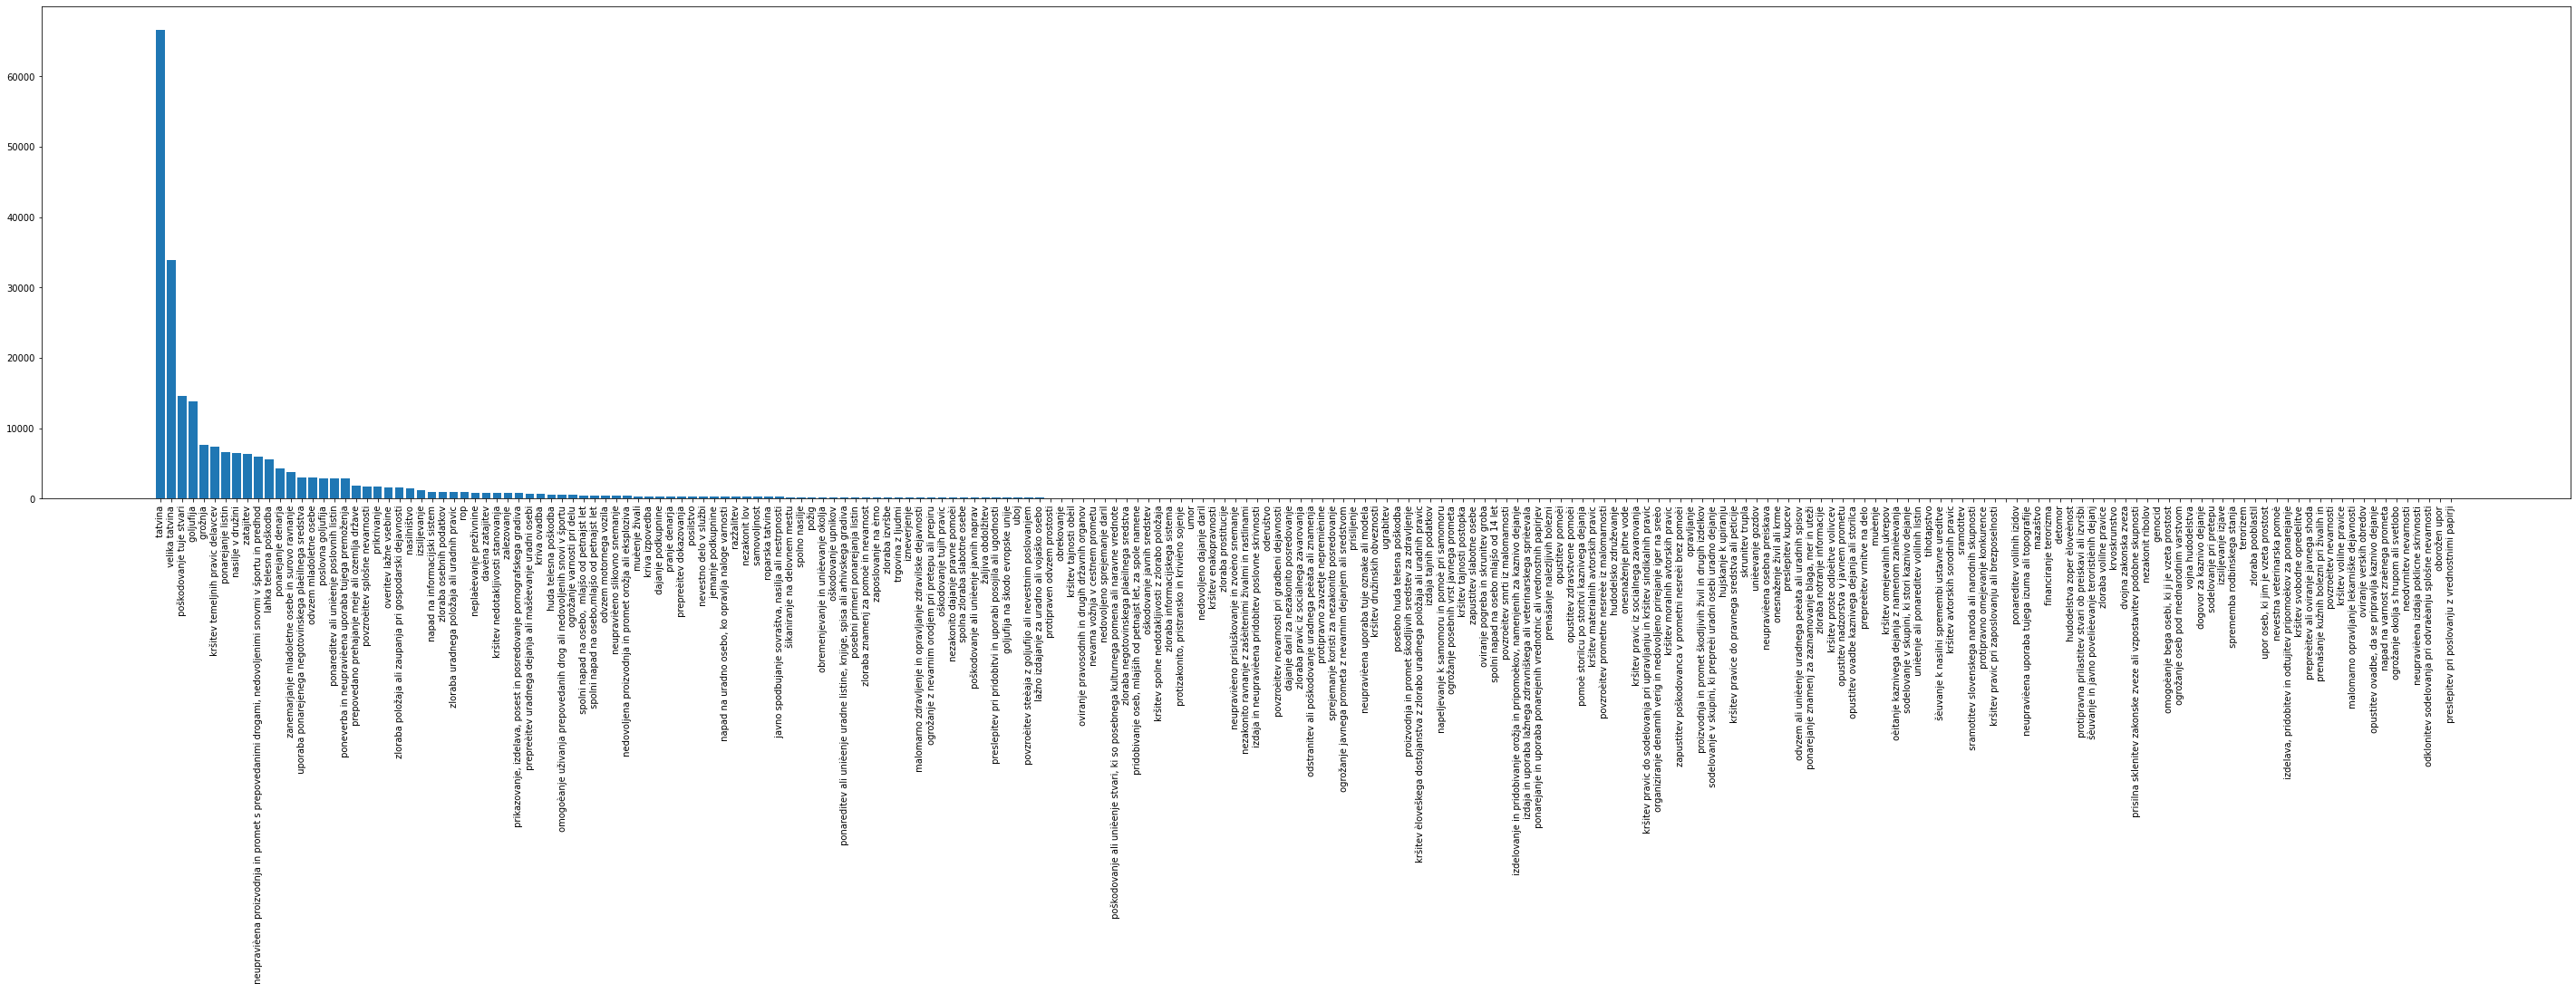

In [14]:
zlocini = np.array([str.split(i, '-')[-1] for i in main_data[:, 6]])

zlocin, count = np.unique([zlocin for zlocin in zlocini], return_counts=True)
dict_zlocini_count = dict(zip(zlocin, count))

x_axis = np.array([dict_zlocini_count[zlocin] for zlocin in zlocin])
y_axis = np.array([str.capitalize(zlocin) for zlocin in zlocin])

x_axis_argsort = np.argsort(x_axis)[::-1]

#plot graph
plt.figure(figsize=(50, 10))
plt.xticks(rotation=90)
plt.bar(y_axis[x_axis_argsort], x_axis[x_axis_argsort])
plt.show()



In [20]:
zlocin = [zl.strip().lower() for zl in zlocin if zl.strip() != '']
print(zlocin)

['dajanje daril za nezakonito posredovanje', 'dajanje podkupnine', 'davèna zatajitev', 'detomor', 'dogovor za kaznivo dejanje', 'dvojna zakonska zveza', 'financiranje terorizma', 'genocid', 'goljufija', 'goljufija na škodo evropske unije', 'grožnja', 'huda telesna poškodba', 'hudodelsko združevanje', 'hudodelstva zoper èloveènost', 'hujskanje k upiranju', 'izdaja in neupravièena pridobitev poslovne skrivnosti', 'izdaja in uporaba lažnega zdravniškega ali veterinarskega sprièevala', 'izdaja tajnih podatkov', 'izdelava, pridobitev in odtujitev pripomoèkov za ponarejanje', 'izdelovanje in pridobivanje orožja in pripomoèkov, namenjenih za kaznivo dejanje', 'izneverjenje', 'izsiljevanje', 'izsiljevanje izjave', 'javno spodbujanje sovraštva, nasilja ali nestrpnosti', 'jemanje podkupnine', 'kriva izpovedba', 'kriva ovadba', 'krvoskrunstvo', 'kršitev avtorskih sorodnih pravic', 'kršitev družinskih obveznosti', 'kršitev enakopravnosti', 'kršitev materialnih avtorskih pravic', 'kršitev moralnih 